In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('data5.csv')
df

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


In [ ]:
df[df['class_buys_computer'] == 'yes']

,age,income,student,credit_rating,class_buys_computer
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
6,middle_aged,low,yes,excellent,yes
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes
10,youth,medium,yes,excellent,yes
11,middle_aged,medium,no,excellent,yes
12,middle_aged,high,yes,fair,yes


In [ ]:
df[df['class_buys_computer'] == 'no']

,age,income,student,credit_rating,class_buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
5,senior,low,yes,excellent,no
7,youth,medium,no,fair,no
13,senior,medium,no,excellent,no


In [ ]:
# 전체 엔트로피 계산
def get_info(df):
    nbuy = df[df['class_buys_computer'] == 'no']
    buy = df[df['class_buys_computer'] == 'yes']
    x = np.array([len(buy) / len(df), len(nbuy) / len(df)])
    y = np.log2(x[x != 0])
    all_i =- sum(x[x != 0] * y)
    return all_i

In [ ]:
get_info(df)

0.9402859586706311

In [ ]:
df['age'].unique()

array(['youth', 'middle_aged', 'senior'], dtype=object)

In [ ]:
# 특정 엔트로피 계산
def get_a_info(df, a_n):
    a_v = df[a_n].unique()
    get_i = []
    for i in a_v:
        s_df = df[df[a_n] == i]
        get_i.append((len(s_df) / len(df)) * get_info(s_df))
    return sum(get_i)

In [ ]:
get_info(df) - get_a_info(df, 'age')

0.24674981977443933

In [ ]:
# y값을 제외한 x의 컬럼들
col_l = [i for i in df.columns if i != 'class_buys_computer']

In [ ]:
# 속성별 Gain 값 계산
for i in col_l:
    print(f'{i} : {get_info(df) - get_a_info(df, i)}')

age : 0.24674981977443933
income : 0.02922256565895487
student : 0.15183550136234159
credit_rating : 0.04812703040826949


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

DecisionTreeClassifier()

In [ ]:
df1 = pd.read_csv('data4.csv')
df1

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
X = df1.drop(['class'], axis = 1)
y = df1['class']
X.shape, y.shape

((6497, 3), (6497,))

<BarContainer object of 2 artists>

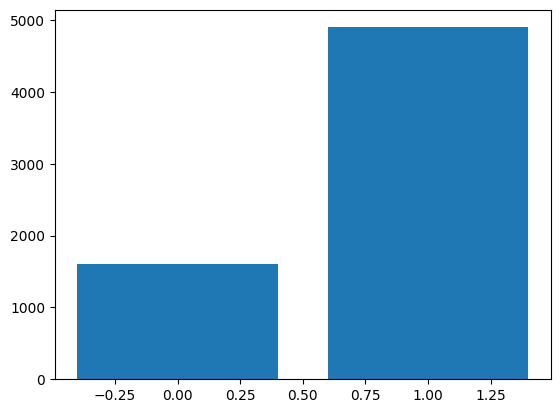

In [ ]:
import matplotlib.pyplot as plt
plt.bar([0, 1], [len(y[y == 0]), len(y[y == 1])])

In [ ]:
from sklearn.model_selection import train_test_split
X_data, tt_x, y_data, tt_y = train_test_split(X, y, random_state = 10, test_size = 0.3)
tr_x, val_x, tr_y, val_y = train_test_split(X_data, y_data, random_state = 10, test_size = 0.2)

<BarContainer object of 2 artists>

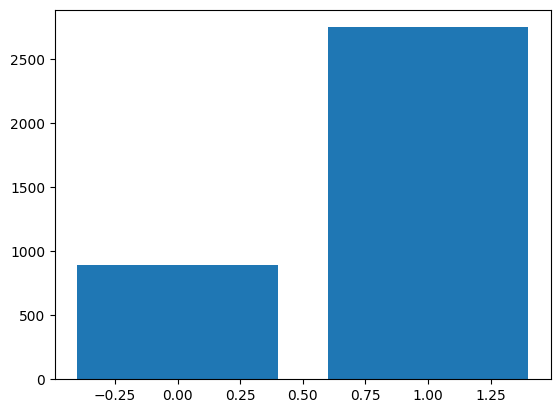

In [ ]:
plt.bar([0,1], [len(tr_y[tr_y == 0]), len(tr_y[tr_y == 1])])

In [ ]:
tr_x.shape, val_x.shape, tt_x.shape, tr_y.shape, val_y.shape, tt_y.shape

((3637, 3), (910, 3), (1950, 3), (3637,), (910,), (1950,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier()
m.fit(tr_x, tr_y)
m.score(tr_x, tr_y), m.score(val_x, val_y), m.score(tt_x, tt_y) # tt_x는 모델이 한번도 들여다보지 않음

(0.9980753368160572, 0.865934065934066, 0.8482051282051282)

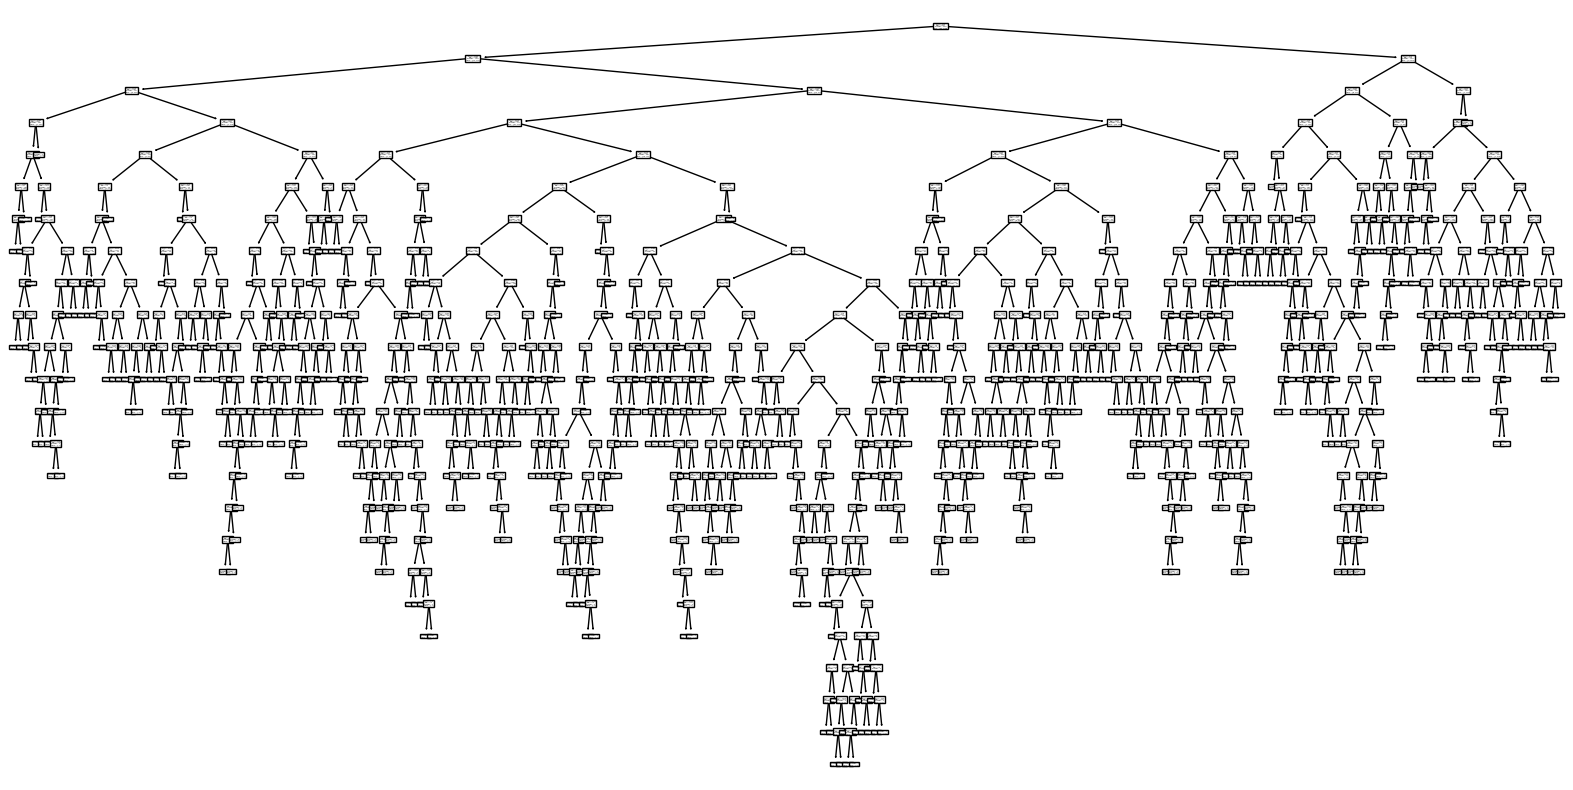

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(m)
plt.show()

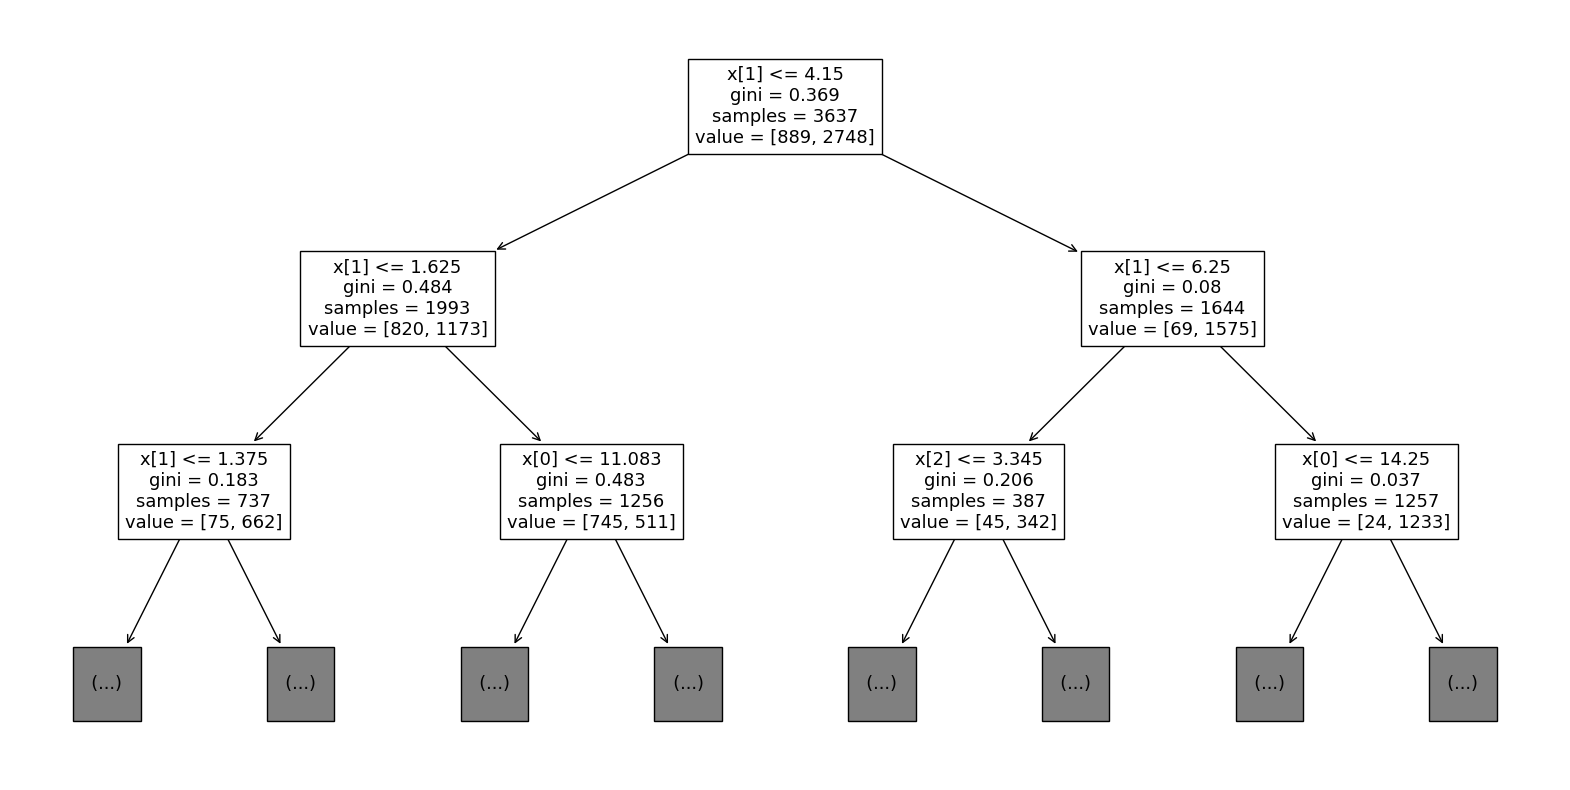

In [ ]:
plt.figure(figsize = (20,10))
plot_tree(m, max_depth = 2)
plt.show()

In [ ]:
# 모수 : 모집단의 특성(모평균, 모분산 등)을 나타내는 값

#모수 선형회귀
#비모수 KNN, 의사결정트리
#세미모수 SVM-마진, 인공신경망-뉴런

In [ ]:
import seaborn as sns
df = sns.load_dataset('iris')
X = df.drop(['species'], axis = 1)
y = df['species']

# 사전 가지치기
m = DecisionTreeClassifier()

# 사후 가지치기
m.fit(X, y)

DecisionTreeClassifier()

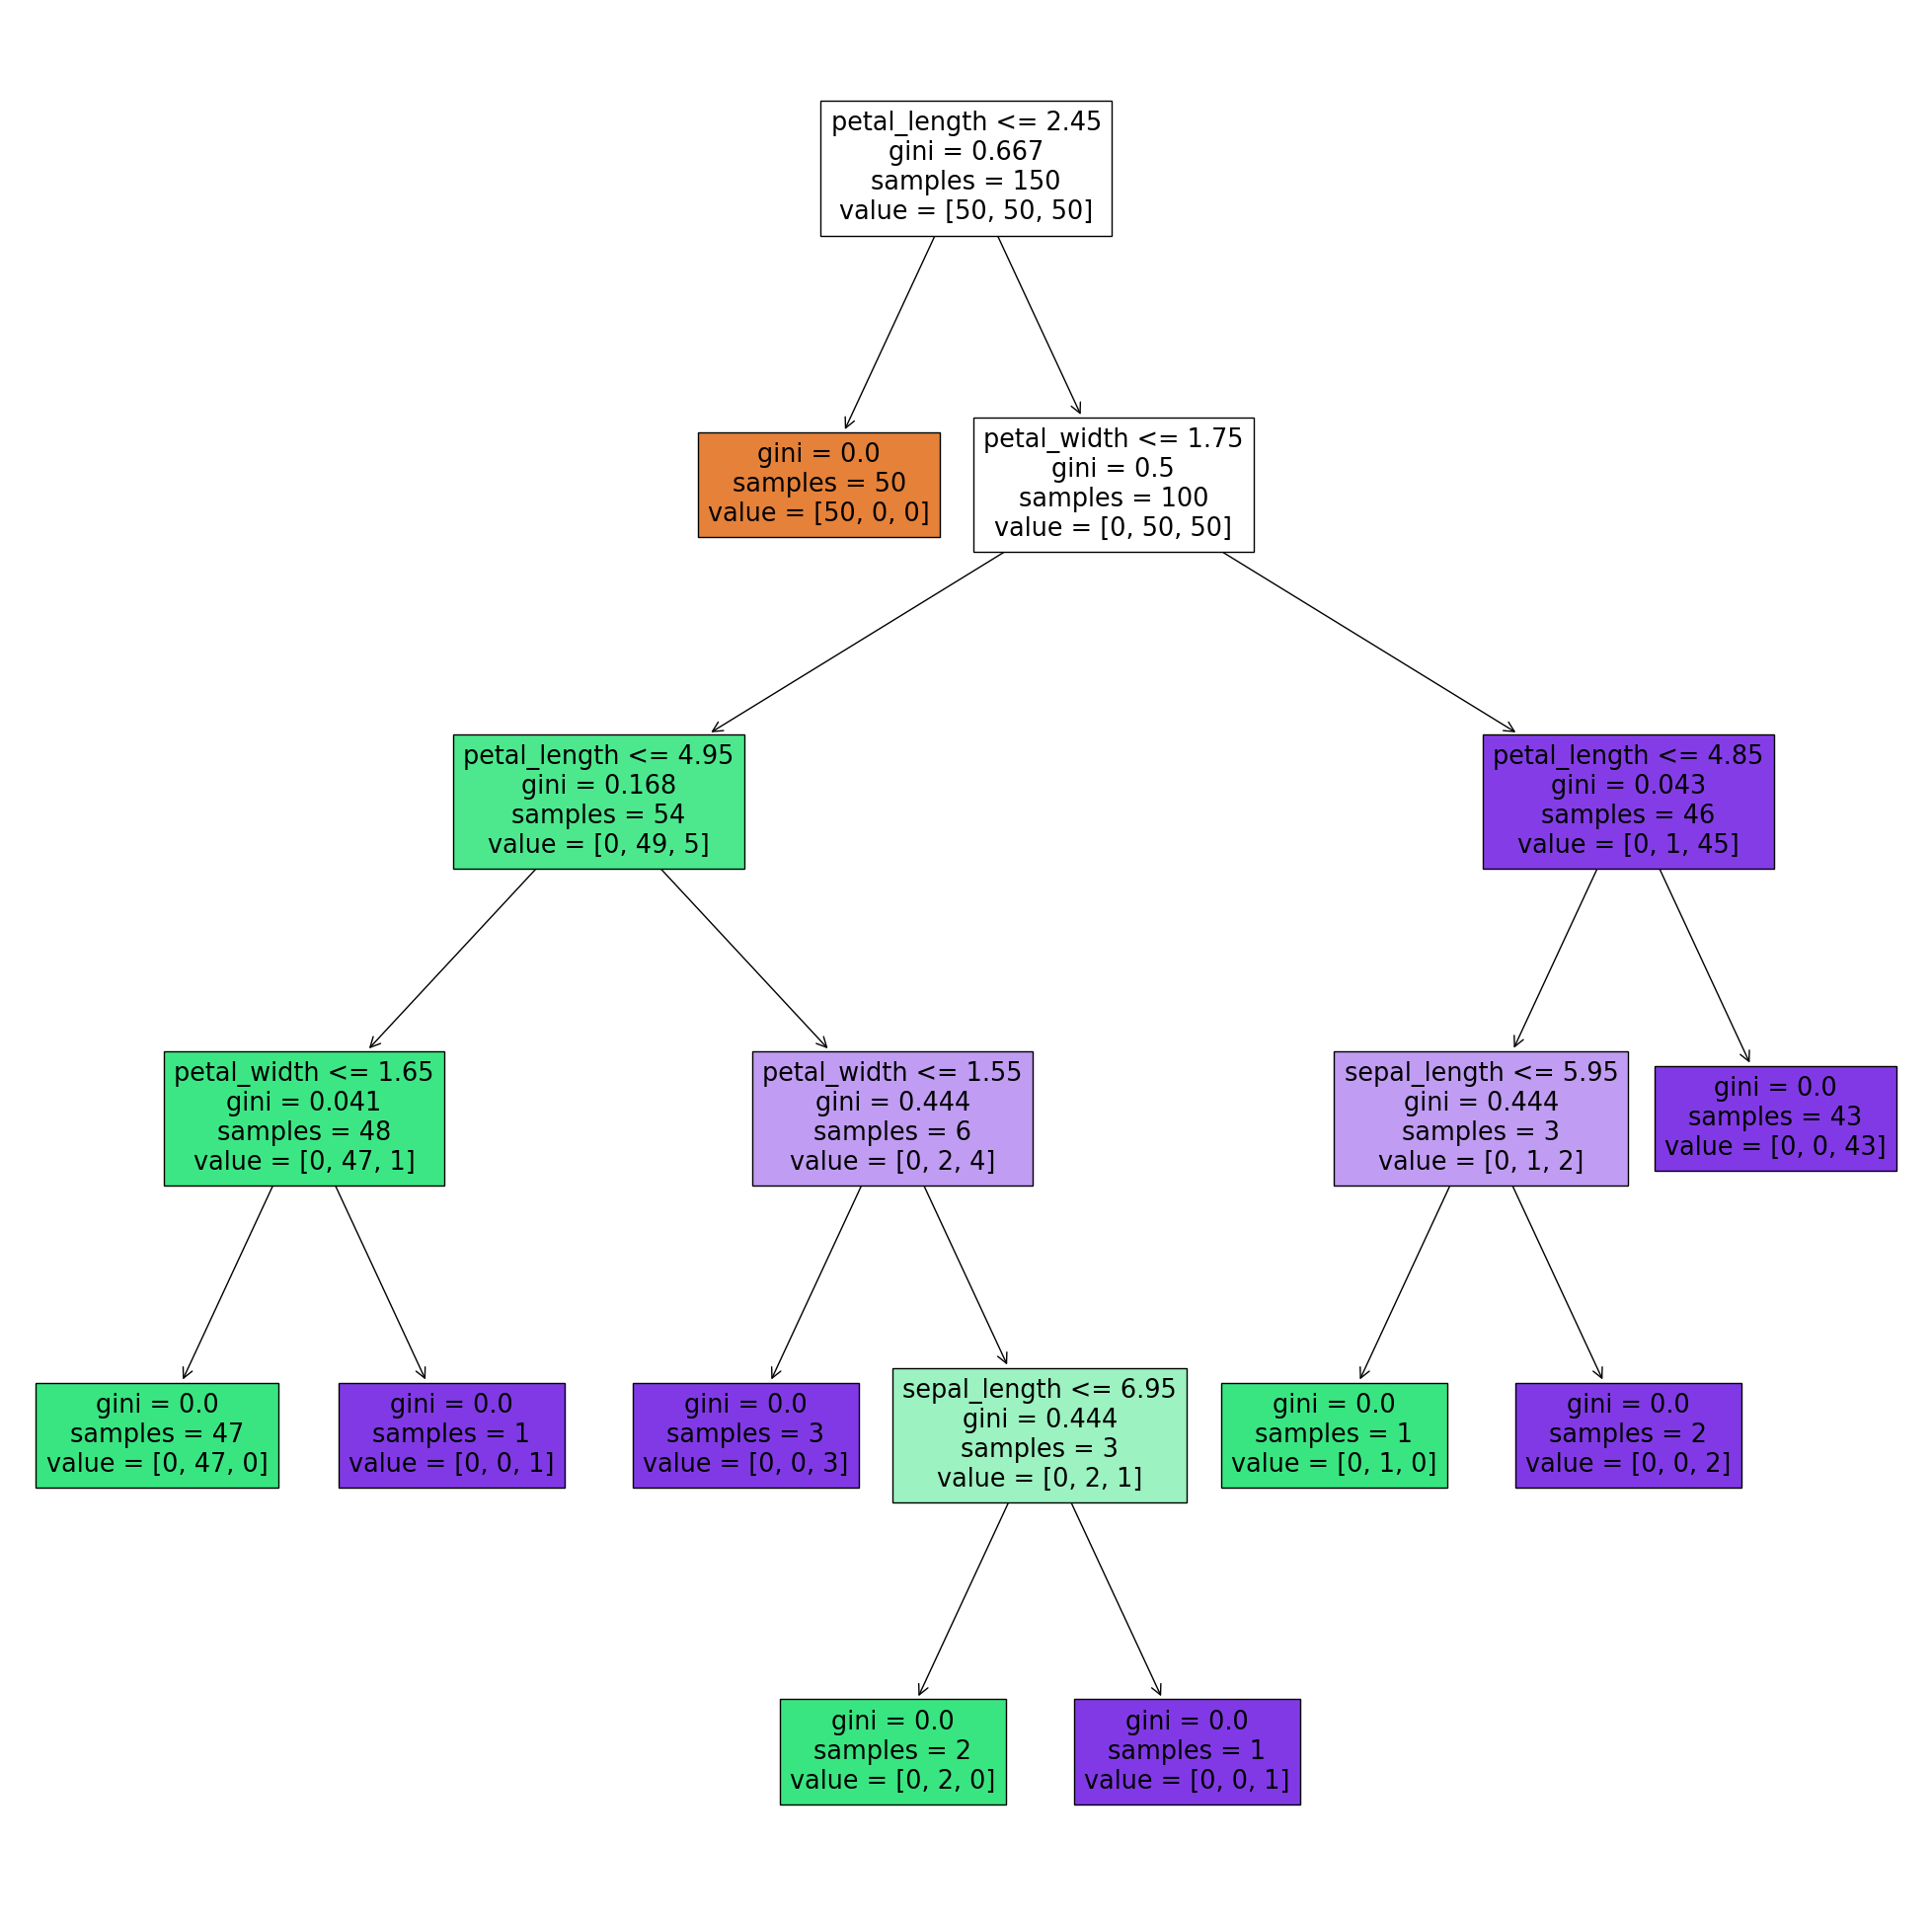

In [ ]:
plt.figure(figsize = (25, 25))
plot_tree(m, feature_names = X.columns, filled = True)
plt.show()

In [ ]:
# 바닐라 앙상블 : 기본적인 앙상블, 동시에 학습해서 평균이나, 투표 방식으로 만들어지는 앙상블 모델
# 부스팅 : 약한 학습기 여러개 -> 순차적으로 학습, 모델 다름 -> 하나 학습 하고 학습된 데이터중 예측이 틀린 데이터로 다음꺼 학습하고
# 배깅 : 같은 모델로 훈련 데이터를 다르게 해서 학습
# 배깅과 부스팅은 기본적으로 약한 학습기 여러개로 강한 학습기를 만드는 기법

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
df = sns.load_dataset('iris')
X = df.drop(['species'], axis = 1)
y = df['species']
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y, test_size = 0.3)
tr_x, val_x, tr_y, val_y = train_test_split(tr_x, tr_y, test_size = 0.2)
tr_x.shape, tr_y.shape, tt_x.shape, tt_y.shape, val_x.shape, val_y.shape

((84, 4), (84,), (45, 4), (45,), (21, 4), (21,))

In [ ]:
s = StandardScaler().fit(tr_x)
s_tr_x = s.transform(tr_x)
s_tt_x = s.transform(tt_x)
s_tr_y = tr_y.values
s_tt_y = tt_y.values

In [ ]:
m1 = LogisticRegression()
m2 = SGDClassifier()
m3 = KNeighborsClassifier()
m4 = DecisionTreeClassifier()
m5 = SVC()

In [ ]:
for i in [m1, m2, m3, m4, m5]:
    print(i, cross_val_score(i, tr_x, tr_y).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression() 0.9404411764705882
SGDClassifier() 0.7742647058823529
KNeighborsClassifier() 0.9404411764705882
DecisionTreeClassifier() 0.9639705882352942
SVC() 0.9397058823529412


In [ ]:
p = {}
for i in [m1, m3, m4, m5]:
    p[str(i)] = {}
p

{'LogisticRegression()': {},
 'KNeighborsClassifier()': {},
 'DecisionTreeClassifier()': {},
 'SVC()': {}}

In [ ]:
p['LogisticRegression()'] = {'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9]}
p['KNeighborsClassifier()'] = {'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9]}
p['DecisionTreeClassifier()'] = {'max_depth' : [1, 2, 3, 4, 5]}
p['SVC()'] = {'C' : [1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [ ]:
p

{'LogisticRegression()': {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'KNeighborsClassifier()': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'DecisionTreeClassifier()': {'max_depth': [1, 2, 3, 4, 5]},
 'SVC()': {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}}

In [ ]:
m_l = []
for i in [m1, m3, m4, m5]:
    gs = GridSearchCV(i, p[str(i)])
    gs.fit(tr_x, tr_y)
    gs.best_index_
    m_l.append(gs)
m_l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[GridSearchCV(estimator=LogisticRegression(),
              param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}),
 GridSearchCV(estimator=KNeighborsClassifier(),
              param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}),
 GridSearchCV(estimator=DecisionTreeClassifier(),
              param_grid={'max_depth': [1, 2, 3, 4, 5]}),
 GridSearchCV(estimator=SVC(), param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]})]

In [ ]:
for m in m_l:
    print(m, m.best_params_, m.best_score_, m.best_index_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}) {'C': 5} 0.9522058823529411 4
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}) {'n_neighbors': 3} 0.9522058823529411 2
GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}) {'max_depth': 2} 0.9639705882352942 1
GridSearchCV(estimator=SVC(), param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9]}) {'C': 5} 0.9757352941176471 4


In [ ]:
m1 = LogisticRegression(C = 2)
m2 = KNeighborsClassifier(n_neighbors = 5)
m3 = DecisionTreeClassifier(max_depth = 3)
m4 = SVC(C = 4)

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
#VotingClassifier()

In [ ]:
VotingClassifier([('Lm', m1),('Km', m2),('Dm', m3),('SVm', m4)])

VotingClassifier(estimators=[('Lm', LogisticRegression(C=2)),
                             ('Km', KNeighborsClassifier()),
                             ('Dm', DecisionTreeClassifier(max_depth=3)),
                             ('SVm', SVC(C=4))])

In [ ]:
e_m = VotingClassifier([('Lm', m1),('Km', m2),('Dm', m3),('SVm', m4)])
cross_val_score(e_m, tr_x, tr_y).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9522058823529411

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report


In [ ]:
df = sns.load_dataset('iris')
X = df.drop(['species'], axis = 1)
y = df['species']
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y, test_size = 0.3)
# tr_x, val_x, tr_y, val_y = train_test_split(tr_x, tr_y, test_size = 0.2)
# tr_x.shape, tr_y.shape, tt_x.shape, tt_y.shape, val_x.shape, val_y.shape

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier, BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
m1 = LogisticRegression()
m2 = KNeighborsClassifier()
m3 = DecisionTreeClassifier()
m4 = SVC()

In [ ]:
VotingClassifier([('Lm', m1),('Km', m2),('Dm', m3),('SVm', m4)])

VotingClassifier(estimators=[('Lm', LogisticRegression()),
                             ('Km', KNeighborsClassifier()),
                             ('Dm', DecisionTreeClassifier()), ('SVm', SVC())])

In [ ]:
e_m = VotingClassifier([('Lm', m1),('Km', m2),('Dm', m3),('SVm', m4)])
cross_val_score(e_m, tr_x, tr_y).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9523809523809523

In [ ]:
p={}
p['LogisticRegression()']={}
p['KNeighborsClassifier()']={}
p['DecisionTreeClassifier()']={}
p['SVC()']={}
p['LogisticRegression()']['C']=[1,2,3,4,5,6,7,8,9]
p['KNeighborsClassifier()']['n_neighbors']=[1,2,3,4,5,6,7,8,9]
p['DecisionTreeClassifier()']['max_depth']=[1,2,3,4,5]
p['SVC()']['C']=[1,2,3,4,5,6,7,8,9]

In [ ]:
e_p={
    'Lm__C':[1,2,3,4,5,6,7,8,9],
    'Km__n_neighbors':[1,2,3,4,5,6,7,8,9],
    'Dm__max_depth':[1,2,3,4,5],
    'SVm__C':[1,2,3,4,5,6,7,8,9]
}

In [ ]:
gs=GridSearchCV(e_m,e_p)
gs.fit(tr_x,tr_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(estimator=VotingClassifier(estimators=[('Lm',
                                                     LogisticRegression()),
                                                    ('Km',
                                                     KNeighborsClassifier()),
                                                    ('Dm',
                                                     DecisionTreeClassifier()),
                                                    ('SVm', SVC())]),
             param_grid={'Dm__max_depth': [1, 2, 3, 4, 5],
                         'Km__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'Lm__C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'SVm__C': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
gs.best_params_

{'Dm__max_depth': 1, 'Km__n_neighbors': 1, 'Lm__C': 4, 'SVm__C': 3}

In [ ]:
gs.best_score_

0.980952380952381

In [ ]:
gs.best_estimator_

VotingClassifier(estimators=[('Lm', LogisticRegression(C=4)),
                             ('Km', KNeighborsClassifier(n_neighbors=1)),
                             ('Dm', DecisionTreeClassifier(max_depth=1)),
                             ('SVm', SVC(C=3))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [ ]:
rf = RandomForestClassifier(10000)
#rf.fit(tr_x, tr_y)

In [ ]:
cross_val_score(rf, tr_x, tr_y).mean()

0.9619047619047618

In [ ]:
m = LogisticRegression()
bg = BaggingClassifier(m, 10)
cross_val_score(bg, tr_x, tr_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([1.        , 0.9047619 , 1.        , 1.        , 0.80952381])

In [ ]:
b_p = {'estimator__C' : [1,2,3,4,5]}

In [ ]:
gs = GridSearchCV(bg, b_p)
gs.fit(tr_x, tr_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=BaggingClassifier(estimator=LogisticRegression()),
             param_grid={'estimator__C': [1, 2, 3, 4, 5]})

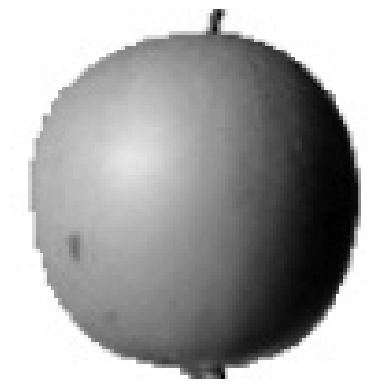

In [ ]:
X = np.load('fruits_300.npy')
X.shape
plt.imshow(X[0], cmap = 'gray_r')
plt.axis('off')
plt.show()

In [ ]:
# 최고차항이 데이터의 갯수
# 데이터 - 300개
# 피쳐 - 10000개

In [ ]:
a = X[:100]
p = X[100:200]
b = X[200:]

In [ ]:
a_v = a.reshape(-1, 100 * 100)
p_v = p.reshape(-1, 100 * 100)
b_v = b.reshape(-1, 100 * 100)

In [ ]:
# 픽셀(피쳐) 별 평균값
m_a_im = a_v.mean(axis = 0)
m_p_im = p_v.mean(axis = 0)
m_b_im = b_v.mean(axis = 0)

In [ ]:
# 사진별 평균값
im_m_a = a_v.mean(axis = 1)
im_m_p = p_v.mean(axis = 1)
im_m_b = b_v.mean(axis = 1)

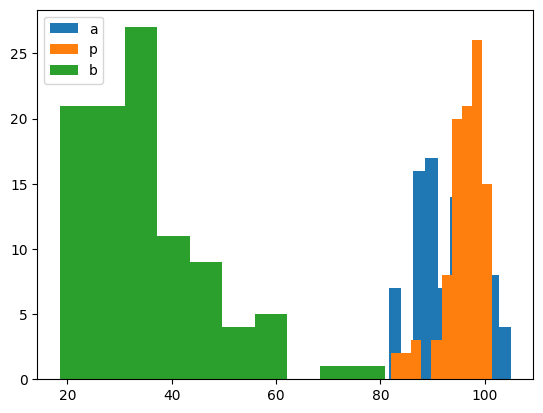

In [ ]:
plt.hist(im_m_a, label = 'a')
plt.hist(im_m_p, label = 'p')
plt.hist(im_m_b, label = 'b')
plt.legend() # 범례
plt.show()

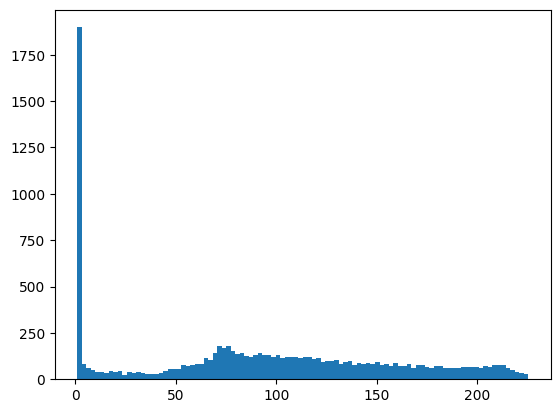

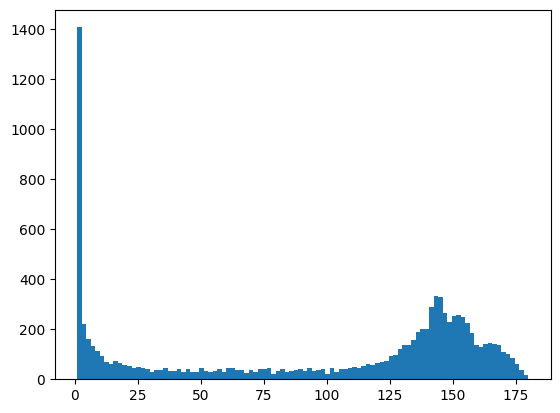

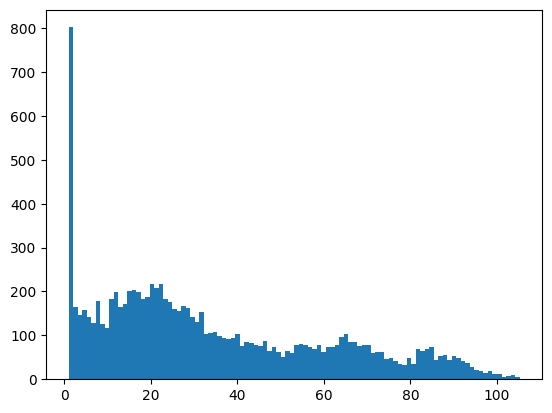

In [ ]:
plt.hist(m_a_im, bins = 100, label = 'a')
plt.show()
plt.hist(m_p_im, bins = 100, label = 'p')
plt.show()
plt.hist(m_b_im, bins = 100, label = 'b')
plt.show()
#plt.legend() # 범례

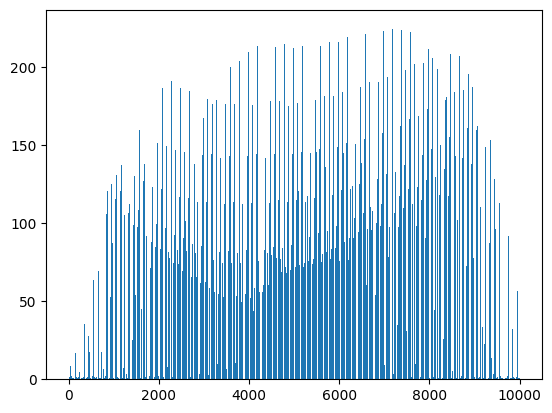

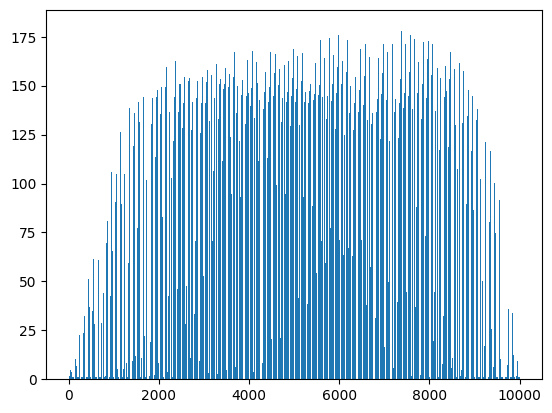

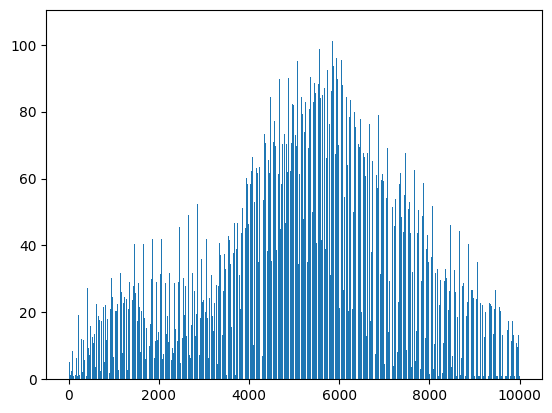

In [ ]:
x = range(10000)
plt.bar(x, m_a_im)
plt.show()
plt.bar(x, m_p_im)
plt.show()
plt.bar(x, m_b_im)
plt.show()
#plt.legend() # 범례

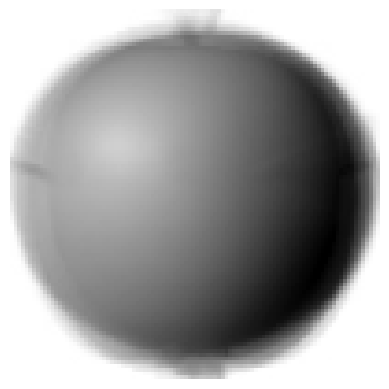

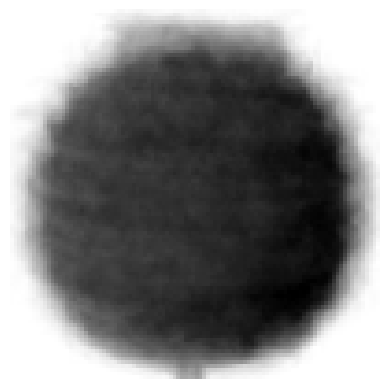

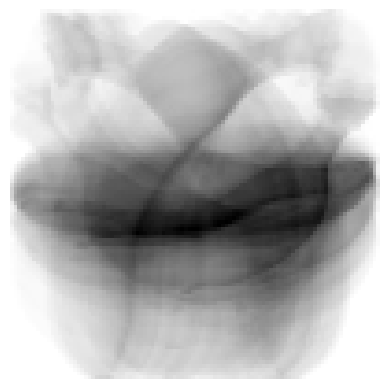

In [ ]:
for i in [m_a_im.reshape(100,100), m_p_im.reshape(100,100), m_b_im.reshape(100,100)]:
    plt.imshow(i, cmap = 'gray_r')
    plt.axis('off')
    plt.show()

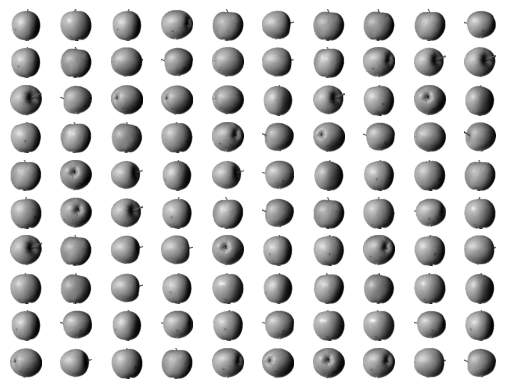

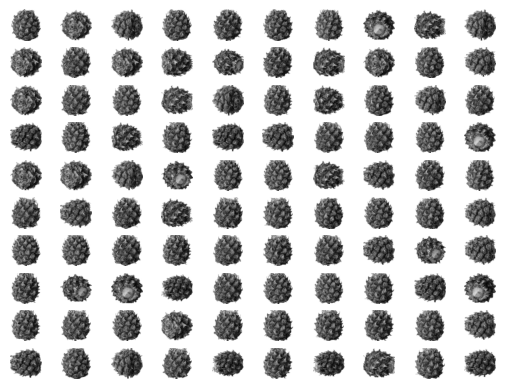

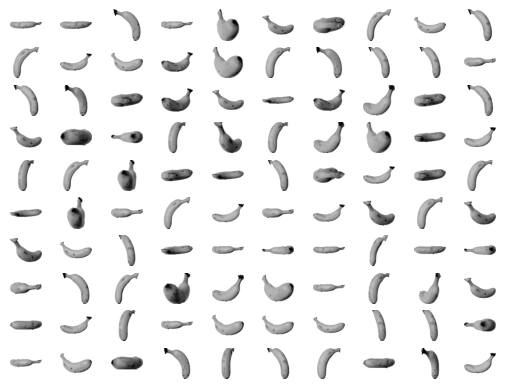

In [ ]:
for a_f in [a, p, b]:
    f, ax = plt.subplots(10, 10)
    for i in range(10):
        for j in range(10):
            ax[i, j].imshow(a_f[(i * 10) + j], cmap = 'gray_r')
            ax[i, j].axis('off')
    plt.show()

In [ ]:
ck_a_im = m_a_im.reshape(100,100)
ck_p_im = m_p_im.reshape(100,100)
ck_b_im = m_b_im.reshape(100,100)
a_data = abs(X - ck_a_im)
a_data = a_data.mean(axis = (1, 2))
p_data = abs(X - ck_p_im)
p_data = p_data.mean(axis = (1, 2))
b_data = abs(X - ck_b_im)
b_data = b_data.mean(axis = (1, 2))

In [ ]:
ai = a_data.argsort()[:100]
pi = p_data.argsort()[:100]
bi = b_data.argsort()[:100]

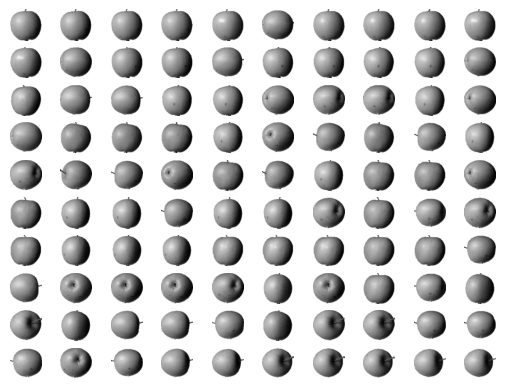

In [ ]:
f, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(X[ai[(i * 10) + j]], cmap = 'gray_r')
        ax[i, j].axis('off')
plt.show()

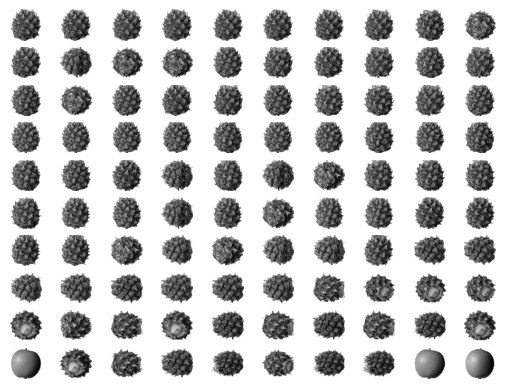

In [ ]:
f, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(X[pi[(i * 10) + j]], cmap = 'gray_r')
        ax[i, j].axis('off')
plt.show()

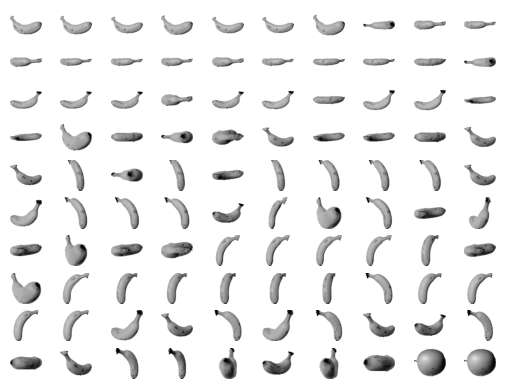

In [ ]:
f, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(X[bi[(i * 10) + j]], cmap = 'gray_r')
        ax[i, j].axis('off')
plt.show()

In [ ]:
s_x = X.reshape(-1, 10000)
s_x.shape

(300, 10000)

In [ ]:
from sklearn.cluster import KMeans
m = KMeans(3, random_state = 20)
m.fit(s_x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=20)

In [ ]:
np.unique(m.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([ 98,  91, 111]))

In [ ]:
l0 = X[m.labels_ == 0]
l1 = X[m.labels_ == 1]
l2 = X[m.labels_ == 2]
l0.shape

(98, 100, 100)

In [ ]:
def 출력함수(arr):
    n = len(arr)
    r = int(np.ceil(n / 10))
    c = n if r < 2 else 10
    f, ax = plt.subplots(r, c, squeeze = False)
    for i in range(r):
        for j in range(c):
            if ((i*10) + j) < n:
                ax[i, j].imshow(arr[(i * 10) + j], cmap = 'gray_r')
            ax[i, j].axis('off')
    plt.show()

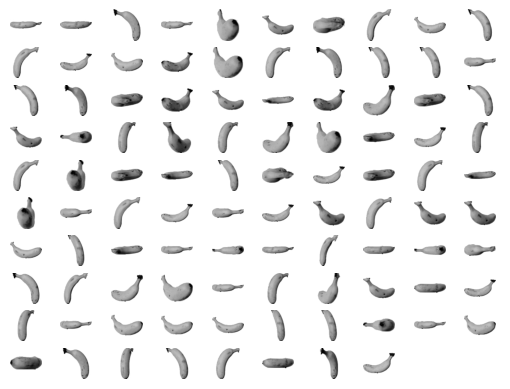

In [ ]:
출력함수(l0)

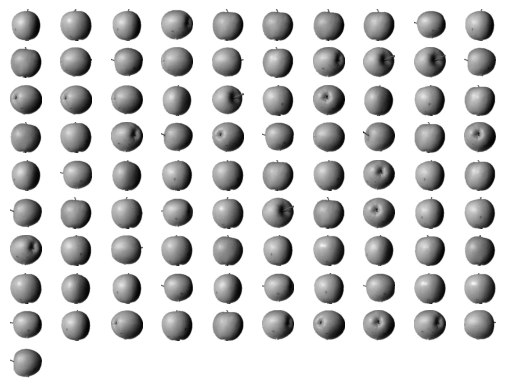

In [ ]:
출력함수(l1)

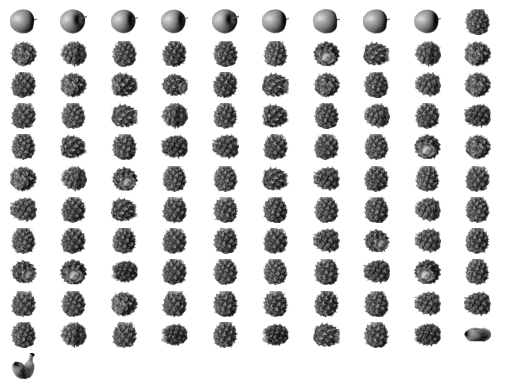

In [ ]:
출력함수(l2)

In [ ]:
out_c = m.cluster_centers_

In [ ]:
out_cs = out_c.reshape(-1, 100, 100)
out_cs.shape

(3, 100, 100)

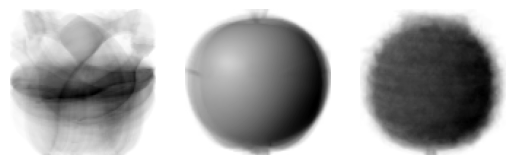

In [ ]:
출력함수(out_cs)

In [ ]:
m.transform(X[:1].reshape(-1, 10000))

array([[8642.61845541, 3087.33092099, 4677.10527943]])

In [ ]:
m.predict(X[:1].reshape(-1, 10000))

array([1], dtype=int32)

In [ ]:
m.inertia_

5074977316.088373

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

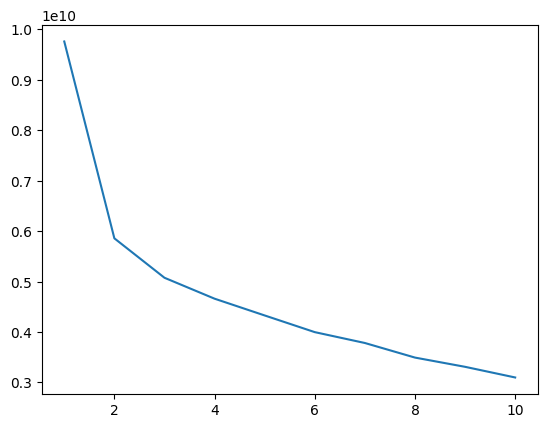

In [ ]:
ck_l = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 10)
    km.fit(s_x)
    ck_l.append(km.inertia_)
plt.plot(range(1, 11), ck_l)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [ ]:
silhouette_samples(s_x, m.labels_)

array([ 0.3075642 ,  0.41524139,  0.30252025,  0.35694702,  0.38698806,
       -0.00687754,  0.34954362,  0.35442226,  0.39519973,  0.28009676,
        0.30534008,  0.36583779,  0.36258892,  0.32004053,  0.36795385,
        0.15671354,  0.40353422,  0.3474238 ,  0.00957633,  0.24803157,
        0.27426645,  0.30890217,  0.34024401,  0.34708822,  0.35546792,
        0.23362964,  0.08353585,  0.4143083 ,  0.32389548,  0.14522535,
        0.3931874 ,  0.4044041 ,  0.28764035,  0.41809221,  0.3223774 ,
        0.28104601,  0.34796029,  0.29742782,  0.39634549,  0.30388374,
        0.37705264,  0.32067215,  0.04354183,  0.26703863,  0.03769544,
        0.29705034,  0.17705121,  0.40198594,  0.41343921,  0.39421707,
        0.41246804,  0.27277768, -0.04273224,  0.37071662,  0.40467765,
        0.29959351,  0.37416667,  0.41641124,  0.31840716,  0.41478581,
        0.25860116,  0.36747129, -0.00232123, -0.0392584 ,  0.3247809 ,
        0.3025225 ,  0.40117436,  0.3091436 ,  0.41550556,  0.26

In [ ]:
from seaborn._core.properties import LineStyle
def c_s(k, x_f):
    km = KMeans(n_clusters = k, random_state = 0)
    py = km.fit_predict(x_f)
    s_v = silhouette_samples(x_f, py)

    y_ax_lo = 0
    y_ax_up = 0
    y_t = []

    for c in range(k):
        c_s_v = s_v[py == c]
        c_s_v.sort()
        y_ax_up += len(c_s_v)
        plt.barh(range(y_ax_lo, y_ax_up), c_s_v, height = 1)
        y_t.append((y_ax_lo + y_ax_up) / 2.)
        y_ax_lo += len(c_s_v)
    s_mean = np.mean(s_v)
    plt.axvline(s_mean, color = 'r', linestyle = '--')
    plt.yticks(y_t, range(k))
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


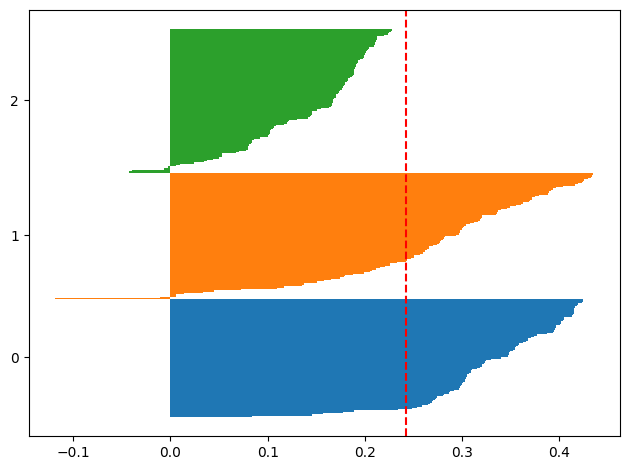

In [ ]:
c_s(3, s_x)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X = np.load('fruits_300.npy')

In [ ]:
y = np.array([0 for _ in range(100)] + [2 for _ in range(100)] + [2 for _ in range(100)])

In [ ]:
X.shape, y.shape

((300, 100, 100), (300,))

In [ ]:
v_X = X.reshape(-1, 100 * 100)
s_x = v_X / 255
s_x

In [ ]:
from sklearn.model_selection import train_test_split
tr_x1, tt_x1, tr_y1, tt_y1 = train_test_split(v_X, y, test_size = 0.3)
tr_x2, tt_x2, tr_y2, tt_y2 = train_test_split(s_x, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()
m.fit(tr_x1, tr_y1)
m.score(tr_x1, tr_y1), m.score(tt_x1, tt_y1)

(1.0, 1.0)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
# 스케일이 안된 데이터
m = LogisticRegression()
log = cross_validate(m, tr_x1, tr_y1)
log

{'fit_time': array([0.37994337, 0.38612437, 0.38894176, 0.34777427, 0.46238708]),
 'score_time': array([0.00340581, 0.0034759 , 0.00337052, 0.00158429, 0.00345922]),
 'test_score': array([1.        , 1.        , 1.        , 0.97619048, 1.        ])}

In [ ]:
# 스케일이 된 데이터
m = LogisticRegression()
log1 = cross_validate(m, tr_x2, tr_y2)
log1

{'fit_time': array([0.54788065, 0.43954253, 0.40329742, 0.57613564, 0.42259192]),
 'score_time': array([0.00379562, 0.00170445, 0.00171208, 0.00424385, 0.00171709]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [ ]:
log['test_score'].mean(), log['fit_time'].mean()

(0.9952380952380953, 0.3930341720581055)

In [ ]:
log1['test_score'].mean(), log1['fit_time'].mean()

(1.0, 0.4778896331787109)

In [ ]:
from sklearn.decomposition import PCA
pca100 = PCA(n_components = 100) # 실수 : 분포비율, 정수 : 차원(피처) 갯수
print(v_X.shape)
pca100.fit(v_X)

(300, 10000)


PCA(n_components=100)

In [ ]:
from sklearn.model_selection import train_test_split
tr_x1, tt_x1, tr_y1, tt_y1 = train_test_split(v_X, y, test_size = 0.3)
tr_x2, tt_x2, tr_y2, tt_y2 = train_test_split(s_x, y, test_size = 0.3)

# --------------------------------
from sklearn.model_selection import cross_val_score, cross_validate
m = LogisticRegression()
cross_val_score(m, tr_x1, tr_y1).mean()

# --------------------------------
# 스코어 점수와 시간을 알 수 있음
log = cross_validate(m, tr_x1, tr_y1)
log['test_score'].mean(), log['fit_time'].mean()

# --------------------------------
m = LogisticRegression()
log1 = cross_validate(m, tr_x2, tr_y2)
log1['test_score'].mean(), log1['fit_time'].mean()

# --------------------------------
log = cross_validate(m, tr_x1, tr_y1) # 스케일 안된
print(log['test_score'].mean(), log['fit_time'].mean())
log1 = cross_validate(m, tr_x2, tr_y2) # 스케일 된
print(log1['test_score'].mean(), log1['fit_time'].mean())

# --------------------------------
from sklearn.decomposition import PCA # kernel PCA도 있음

pac100 = PCA(n_components = 100)# 실수 : 분포비율, 정수 : 차원(피쳐)갯수
print(v_X.shape)
pac100.fit(v_X)

# --------------------------------

pac100.components_.shape

# --------------------------------
pca_s_x = pac100.transform(v_X)
pca_s_x.shape

# --------------------------------
m = LogisticRegression()
log2 = cross_validate(m, pca_s_x, y)
log2['test_score'].mean(), log2['fit_time'].mean()

def 출력함수(arr):
  n = len(arr)
  r = int(np.ceil(n / 10))
  c = n if r < 2 else 10
  f, ax = plt.subplots(r, c, squeeze = False)
  for i in range(r):
    for j in range(c):
      if (i * 10) + j < n:
        ax[i, j].imshow(arr[(i * 10) + j], cmap = 'gray_r')
      ax[i, j].axis('off')
  plt.show()


출력함수(pca10.components_.reshape(-1, 100, 100))

In [1]:
a = [1,2,3,4,5]
for i in range(5):
    print(a[i])

1
2
3
4
5
